## If you find this kernel helpful, Please UPVOTES.

## Problem Definition
* Given clinical parameters about a patient, can we predict whether or not they have diabets?

## We will use the following CLASSIFICATION METHODS for Prediction
* LOGISTIC REGRESSION MODEL
* RANDOM FORESTS MODEL
* KNN MODEL
* NAIVE BAYES MODEL
* SVC MODEL
* GBM MODEL
* XGBoost MODEL
* LightGBM MODEL

## Data contains;
* Pregnancies
* Glucose = Glucose rate
* BloodPressure 
* SkinThickness 
* Insulin = Inusilin rate
* BMI = Body Mass Index
* DiabetesPedigreeFunction 
* Age 
* Outcome = diabet:1, not diabet:0

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## DATA READING AND EXPLORING

In [ ]:
data=pd.read_csv("/kaggle/input/diabetes/diabetes.csv")

In [ ]:
df=data.copy()  #bir variable modeli etkileyen bisey degilse drop etmemiz lazim

In [ ]:
df.head()

In [ ]:
df.info()#bazi kategorik degiskenler derece belirtir aslindas integer bisey modelden cikaramam hemen.

In [ ]:
df.nunique() #tur sayisi

In [ ]:
df[df['Glucose'] == 0]


In [ ]:
len(df[df['Glucose'] == 0])

In [ ]:
len(df[df['Insulin'] == 0])

In [ ]:
df.duplicated().sum()

In [ ]:
df.describe().T 

In [ ]:
print(df.shape)
print(df.ndim)
print(df.size)

In [ ]:
df.corr() #I can see from here which variables I can put into the model
#For example, the variables can be removed by looking at the order of importance.
#Onem durumuna gore istersek bazi variable lari silebiliriz.

## SOME OF VISUALIZATION

In [ ]:
plt.figure(figsize = (12,6)) 
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);

* There is correlation between Outcome and Glucose

In [ ]:
sns.pairplot(df,hue='Outcome')

In [ ]:
df.isnull().sum() #nan degerleri olan sutunlari tarama

In [ ]:
#VISUALIZATION OF NAN  VALUES
#Nan value yok. Gerekli degil.
import missingno as msno 
msno.matrix(df)
plt.show()

* There is no Nan values

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=df,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=df,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=df,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=df,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=df,hue="Outcome")

In [ ]:
sns.swarmplot(x='Outcome',y='BloodPressure',data=df,hue='Outcome')

In [ ]:
sns.countplot(x="Outcome",data=df)

* Count of not diabet is more than diabet.

## PREDICTION WITH CLASSIFICATION METHODS

### Preparation dependent and independent variables

In [ ]:

x_dat=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

### Normalization of variabales

In [ ]:
#If there is a outlier values, it must be done before coming here
x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values  

### Test-Train splitting

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 
#train test ayrilirken kucuk veri ise % 80 yapmak lazim yani yuksek yapmak lazim ama veri buyukse % 60 bile yapilabilir.

## 1) logistic regression

Logistic Regression ( Lojistik Regresyon ) sınıflandırma işlemi yapmaya yarayan bir regresyon yöntemidir. Kategorik veya sayısal verilerin sınıflandırılmasında kullanılır. Bağımlı değişkenin yani sonucun sadece 2 farklı değer alabilmesi durumda çalışır. ( Evet / Hayır, Erkek / Kadın, Şişman / Zayıf vs. )

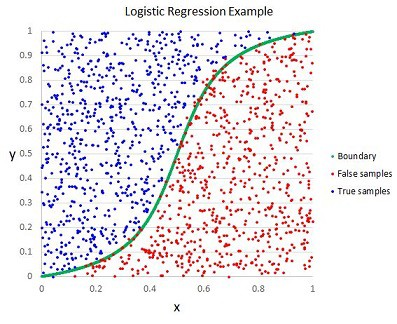 


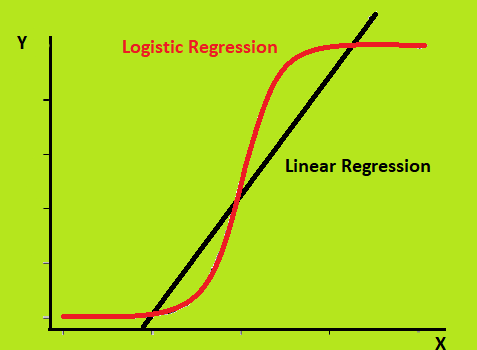

### A ) Modeling of Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression() #default olanlar gelir.C var..
lr_model.fit(x_train,y_train)

In [ ]:
?lr_model

In [ ]:
print(lr_model.intercept_)
print(lr_model.coef_)#Bu katsayilar diebeti etkileme katsayisi mesela insulin 4 kat etkiliyor.mesela - olanlar ters yonde etkiliyor.

### B ) Prediction of Logistic Regression

In [ ]:
y_pred=lr_model.predict(x_test)

In [ ]:
y_pred[0:10]#tahminlerin ilk 10 degerini gorduk

### C ) Accuracy Test(for default) of Logistic regression

In [ ]:
accuracy_score(y_test,y_pred)

### Proba values - probability

In [ ]:
y_probs = lr_model.predict_proba(x_test)[:,1]


In [ ]:
y_probs

In [ ]:
y_pred = [1 if i >0.70 else 0 for i in y_probs]
y_pred[:10]

In [ ]:
log_score = accuracy_score(y_test,y_pred)
print ("log score=",log_score)

In [ ]:
confusion_matrix(y_test,y_pred)

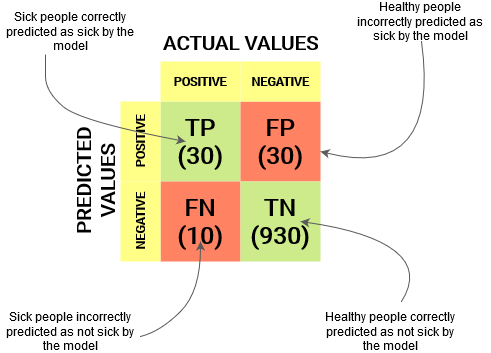

### D ) Model tuning of Logistic regression

In [ ]:
lr_model = LogisticRegression(solver = "liblinear")
lr_model= lr_model.fit(x_train,y_train)
lr_model

In [ ]:
lr_model.predict(x_test)

In [ ]:
accuracy_score(y_test, lr_model.predict(x_test))

In [ ]:
#Cross validation (10 katli ) yaparsak
lr_finalscore=cross_val_score(lr_model, x_test, y_test, cv = 5).mean()
lr_finalscore

## 2 ) Gaussian Naive Bayes

* Naive Bayes sınıflandırıcısı, bir sınıftaki belirli bir özelliğin varlığının başka herhangi bir özelliğin varlığıyla ilgisi olmadığını varsayar.
* Örneğin, kırmızı, yuvarlak ve çapı yaklaşık 3 inç olan bir meyve elma olarak kabul edilebilir. Bu özellikler birbirine veya diğer özelliklerin varlığına bağlı olsa bile, tüm bu özellikler bağımsız olarak bu meyvenin bir elma olma olasılığına katkıda bulunur

###  A ) Modeling of NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
nb_model

### B ) Prediction of NB

In [ ]:
y_pred = nb_model.predict(x_test)
y_pred

### C ) Accuracy score of NB 

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

### D ) Model Tuning of NB

In [ ]:
# 10 katli cross validation.
nb_finalscore=cross_val_score(nb_model, x_test, y_test, cv = 10).mean()
nb_finalscore

## 3 ) KNN

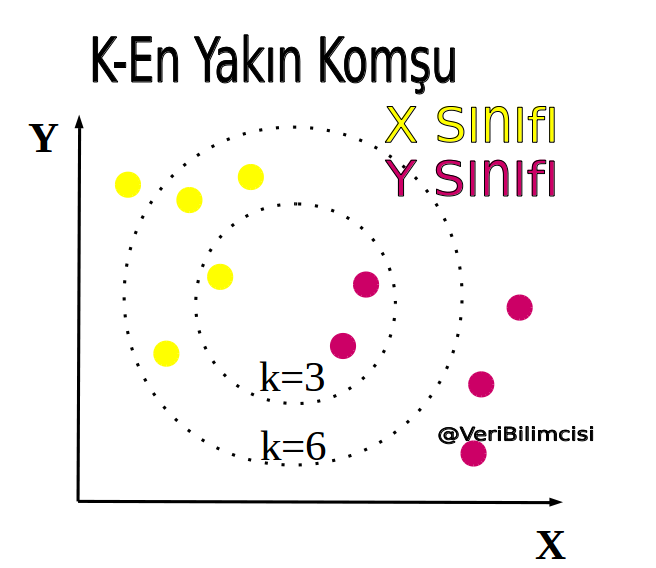

KNN ile temelde yeni noktaya en yakın noktalar aranır. K, bilinmeyen noktanın en yakın komşularının miktarını temsil eder. Sonuçları tahmin etmek için algoritmanın k miktarını (genellikle bir tek sayı) seçeriz.

### A ) Modeling of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train, y_train)
knn_model

### B ) Prediction of KNN

In [ ]:
y_pred = knn_model.predict(x_test)

### C ) Accuracy score of KNN

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)

### D ) Model Tuning of KNN

In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

In [ ]:
print("The best score:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

In [ ]:
knn = KNeighborsClassifier(3)  #we choose 3 neigboors. I think 1 is not good 
knn_tuned = knn.fit(x_train, y_train)

In [ ]:
knn_finalscore=knn_tuned.score(x_test, y_test)
knn_finalscore

## 4 )SVC

### A ) Modeling of SVC

In [ ]:
from sklearn.svm import SVC
svm_model = SVC().fit(x_train,y_train)#we choose default c:1,kernel:'rbf',dagree:3...
#?svm_model

### B ) Prediction of SVC

In [ ]:
y_pred = svm_model.predict(x_test)

### C ) Accuracy score of SVC

In [ ]:
accuracy_score(y_test,y_pred)

### D ) Model Tuning of SVC

#### For kernel:rbf

In [ ]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "rbf")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1,        
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Parametre sözlüğü oluşturulduktan sonraki adım, GridSearchCV sınıfının bir örneğini oluşturmaktır. Temel olarak yürütmek istediğiniz algoritma olan tahmin edici parametresi için değerler iletmeniz gerekir.
* param_grid parametresi, parametre olarak az önce oluşturduğumuz parametre sözlüğünü,
* the scoring parameter performans metriklerini, 
* cv parametresi bizim durumumuzda 10 olan kat sayısını ve
* n_jobs parametresi, parametre olarak kullanılan CPU sayısını ifade eder. yürütmek için kullanmak istiyorsunuz. n_jobs parametresi için -1 değeri, mevcut tüm bilgi işlem gücünün kullanıldığı anlamına gelir. Çok sayıda veriniz varsa bu kullanışlı olabilir.

* n_jobs=-1, tüm işlemcileri kullanmak anlamına gelir.
* verbose int: Controls the verbosity: the higher, the more messages.(Ayrıntıyı kontrol eder: ne kadar yüksekse, o kadar fazla mesaj.)

In [ ]:
print("The best parameters: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned1 = SVC(kernel = "rbf", C = 8).fit(x_train, y_train)

y_pred = svc_tuned1.predict(x_test)
accuracy_score(y_test, y_pred)


#### For kernel:linear

In [ ]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

In [ ]:
print("The best parameters: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned2 = SVC(kernel = "linear", C = 6).fit(x_train, y_train)
y_pred = svc_tuned2.predict(x_test)
accuracy_score(y_test, y_pred)

#### For kernel:rbf , C and gamma 

In [ ]:
svc_model = SVC(kernel = "rbf").fit(x_train, y_train)

In [ ]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [ ]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(x_train, y_train)

In [ ]:
print("The best parameters: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned3 = SVC(C = 5, gamma =50).fit(x_train, y_train)
y_pred = svc_tuned3.predict(x_test)
svc_finalscore=accuracy_score(y_test, y_pred)
svc_finalscore


## 5 ) Random Forests
* Average of decision trees
* Decison is what we need, but it is not so. During the test phase, if the decision is tried, if the data is big and the score is good, we decide that it will be random forest.
* Decision can give different results each time because it is 1 tree but not so in r.forest.
* R.forest gets good score if the data is small but light gbm gets better score if big data

### A ) Modeling of Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
#?rf_model  #n estimator default 100 trees

### B ) Prediction of Random Forests

In [ ]:
y_pred = rf_model.predict(x_test)

### C ) Accuracy score of Random Forests

In [ ]:
accuracy_score(y_test, y_pred)

### D ) Model Tuning of Random Forests

In [ ]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [ ]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [ ]:
#rf_cv_model.fit(x_train, y_train)

In [ ]:
#print("The best parameters: " + str(rf_cv_model.best_params_))

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(x_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(x_test)
rf_finalscore=accuracy_score(y_test, y_pred)
rf_finalscore

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = x_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Importance Levels")

## 6 ) Gradient Boosting Machines

### A ) Modeling of GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(x_train, y_train)

### B ) Prediction of GBM

In [ ]:
y_pred = gbm_model.predict(x_test)

### C ) Accuracy score of GBM

In [ ]:
accuracy_score(y_test, y_pred)

### D ) Model Tuning of GBM

In [ ]:
# gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
#              "n_estimators": [100,500,100],
#              "max_depth": [3,5,10],
#              "min_samples_split": [2,5,10]}

In [ ]:
# gbm = GradientBoostingClassifier()

In [ ]:
# gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
# gbm_cv.fit(x_train, y_train)

In [ ]:
#print("The best parameters: " + str(gbm_cv.best_params_))

In [ ]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 10,
                                min_samples_split = 10,
                                n_estimators = 100)

In [ ]:
gbm_tuned =  gbm.fit(x_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(x_test)
gbm_finalscore=accuracy_score(y_test,y_pred)
gbm_finalscore

## 7 ) XGBoost

### A ) Modeling of XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(x_train, y_train)
#?xgb_model

### B ) Prediction of XGBoost

In [ ]:
y_pred = xgb_model.predict(x_test)

### C ) Accuracy of XGBoost

In [ ]:
accuracy_score(y_test, y_pred)

### D ) Model Tuning of XGBoost

In [ ]:
# #xgb_params = {
#         'n_estimators': [100, 500, 1000, 2000],
#         'subsample': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5,6],
#         'learning_rate': [0.1,0.01,0.02,0.05],
#         "min_samples_split": [2,5,10]}

In [ ]:
# xgb = XGBClassifier()

# xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
# xgb_cv_model.fit(x_train, y_train)

In [ ]:
#print("The best parameters:"+str(xgb_cv_model.best_params_)

In [ ]:
#?xgb_model

In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    n_estimators = 100,
                    subsample = 0.8)
xgb_tuned =  xgb.fit(x_train,y_train)
y_pred = xgb_tuned.predict(x_test)
XGBoost_finalscore=accuracy_score(y_test, y_pred)
XGBoost_finalscore

## 8 ) LightGBM

### A ) Modeling of LightGBM

In [ ]:
!conda install -c conda-forge lightgbm

In [ ]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier().fit(x_train, y_train)

### B ) Prediction of LightGBM

In [ ]:
y_pred = lgbm_model.predict(x_test)

### C ) Accuracy score of LightGBM

In [ ]:
accuracy_score(y_test, y_pred)

### D ) Model Tuning of LightGBM

In [ ]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [ ]:
# lgbm = LGBMClassifier()

# lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
#                              cv = 10, 
#                              n_jobs = -1, 
#                              verbose = 2)
# lgbm_cv_model.fit(x_train, y_train)

In [ ]:
#print("The best parameters:"+str(lgbm_cv_model.best_params_))

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 4,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 10)
lgbm_tuned = lgbm.fit(x_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(x_test)
lgbm_finalscore=accuracy_score(y_test, y_pred)
lgbm_finalscore

## LOOK AT ALL SCORE OF CLASSIFICATION METHODS
The most successful models are GBM=0.985 and LightGBM=0.985

* LOGISTIC REGRESSION MODEL:0.7575
* RANDOM FORESTS MODEL: 0.975
* KNN MODEL: 0.845
* NAIVE BAYES MODEL: 0.7674
* SVC MODEL: 0.975
* GBM MODEL: 0.985
* XGBoost MODEL: 0.90
* LightGBM MODEL: 0.985

In [ ]:
print(lr_finalscore,rf_finalscore,knn_finalscore,svc_finalscore,nb_finalscore,gbm_finalscore,XGBoost_finalscore,lgbm_finalscore)

In [ ]:
# indexx = ["Log","RF","KNN","SVM","NB","GBM","XGBoost""LightGBM"]
# regressions = [lr_finalscore,rf_finalscore,knn_finalscore,svc_finalscore,nb_finalscore,gbm_finalscore,XGBoost_finalscore,lgbm_finalscore]

# plt.figure(figsize=(8,6))
# sns.barplot(x=indexx,y=regressions)
# plt.xticks()
# plt.title('Comparision of Classification Methods',color = 'orange',fontsize=20);

In [ ]:
# from plotly.plotly import iplot
# import plotly.graph_objs as go
# import chart_studio.plotly as py


# indexx = ["Log","RF","KNN","SVM","NB","GBM","XGBoost""LightGBM"]
# regressions = [lr_finalscore,rf_finalscore,knn_finalscore,svc_finalscore,nb_finalscore,gbm_finalscore,XGBoost_finalscore,lgbm_finalscore]
# # creating trace1
# trace1 =go.Scatter(
#                     x = indexx,
#                     y = regressions,
#                     mode = "lines+markers+text",
#                     name = "#",
#                     marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
#                     text= indexx) #uzerine geldiginde ne gorunsun.

# data = [trace1]  # olusturdugumuz veriler listeye atadik

# # konumlandirmayi yapar ve isimlendirir.(layout)
# layout = dict(title = 'Model Compare',
#               xaxis= dict(title= 'Models',ticklen= 15,zeroline= True),
#               yaxis= dict(title= 'Scores',ticklen= 15,zeroline= True)
#              )
# fig = dict(data = data, layout = layout)
# iplot(fig)